# Portfolio Volatility as a Function of Number of Assets
This notebook calculates and visualizes portfolio volatility as a function of 
the number of assets in a portfolio. We use Modern Portfolio Theory (MPT) 
to show how diversification and correlation affect portfolio risk.

## Import Required Libraries
We start by importing the necessary libraries: `numpy` for numerical 
operations and `matplotlib.pyplot` for plotting.

In [52]:
import numpy as np
import matplotlib.pyplot as plt

## Define the Portfolio Volatility Function
This function calculates the portfolio volatility given:
- Number of assets in the portfolio
- Correlation between the assets
- Volatility of individual assets

The formula is derived from Modern Portfolio Theory (MPT):

$$ 
\text{Portfolio Variance} = \sigma^2 \left[ \frac{1 - \rho}{n} + \rho \right]
$$

This function for calculating portfolio volatility is derived from the mathematical framework of **Modern Portfolio Theory (MPT)**, which models the behavior of portfolio volatility based on asset correlation and individual asset variances.

### Here's a breakdown of its origin and how it works:

#### 1. Portfolio Variance Formula
The variance of a portfolio is calculated as:

$$
\text{Portfolio Variance} = \sum_{i=1}^{n} \sum_{j=1}^{n} w_i w_j \sigma_i \sigma_j \rho_{ij}
$$

Where:
- $w_i, w_j$: Weights of assets $i$ and $j$ in the portfolio.
- $\sigma_i, \sigma_j$: Volatilities (standard deviations) of the assets.
- $\rho_{ij}$: Correlation between assets $i$ and $j$.

For simplicity, in this case:
- Each asset is assumed to have **equal weight** ($w_i = \frac{1}{n}$).
- All correlations between assets ($\rho_{ij}$) are constant ($\rho_{ij} = \text{corr}$).

This simplifies the formula to:

$$
\text{Portfolio Variance} = \sigma^2 \left[ \frac{(1 - \rho)}{n} + \rho \right]
$$

Where:
- $\sigma^2$: Variance of each individual asset.
- $n$: Number of assets in the portfolio.
- $\rho$: Average correlation between the assets.

---

### Algebraic Steps to Simplify Portfolio Variance

We start with the general formula for portfolio variance:

$$
\text{Portfolio Variance} = \sum_{i=1}^{n} \sum_{j=1}^{n} w_i w_j \sigma_i \sigma_j \rho_{ij}
$$

#### Step 1: Assume Equal Weights
Assume each asset has equal weight, so:

$$
w_i = \frac{1}{n}, \quad \forall i
$$

Substituting this into the formula gives:

$$
\text{Portfolio Variance} = \sum_{i=1}^{n} \sum_{j=1}^{n} \frac{1}{n} \cdot \frac{1}{n} \cdot \sigma_i \cdot \sigma_j \cdot \rho_{ij}
$$

#### Step 2: Factor Out Constant Terms
Since $ w_i = \frac{1}{n} $, the double summation includes a factor of $ \frac{1}{n^2} $. Assuming all individual volatilities are the same ($ \sigma_i = \sigma $), this simplifies to:

$$
\text{Portfolio Variance} = \frac{\sigma^2}{n^2} \sum_{i=1}^{n} \sum_{j=1}^{n} \rho_{ij}
$$

#### Step 3: Split the Summation Based on $ i = j $ and $ i \neq j $
The terms in the summation can be split into two cases:
1. When $ i = j $, the correlation $ \rho_{ij} = 1 $ (an asset is perfectly correlated with itself).
2. When $ i \neq j $, the correlation $ \rho_{ij} = \rho $ (average correlation between different assets).

Thus, the summation can be written as:

$$
\sum_{i=1}^{n} \sum_{j=1}^{n} \rho_{ij} = \sum_{i=1}^{n} \rho_{ii} + \sum_{i=1}^{n} \sum_{j \neq i} \rho_{ij}
$$

#### Step 4: Simplify Each Term
- The first term ($ \sum_{i=1}^{n} \rho_{ii} $) includes $ n $ terms, each equal to 1:

$$
\sum_{i=1}^{n} \rho_{ii} = n
$$

- The second term ($ \sum_{i=1}^{n} \sum_{j \neq i} \rho_{ij} $) includes $ n(n-1) $ terms, each equal to $ \rho $:

$$
\sum_{i=1}^{n} \sum_{j \neq i} \rho_{ij} = n(n-1) \rho
$$

#### Step 5: Combine the Results
Combining these results, we have:

$$
\sum_{i=1}^{n} \sum_{j=1}^{n} \rho_{ij} = n + n(n-1) \rho
$$

Substitute this back into the variance equation:

$$
\text{Portfolio Variance} = \frac{\sigma^2}{n^2} \left[ n + n(n-1)\rho \right]
$$

#### Step 6: Simplify the Expression
Factor $ n $ from the terms in brackets:

$$
\text{Portfolio Variance} = \frac{\sigma^2}{n^2} \cdot n \left[ 1 + (n-1)\rho \right]
$$

Simplify further:

$$
\text{Portfolio Variance} = \frac{\sigma^2}{n} \left[ 1 + (n-1)\rho \right]
$$

Distribute the terms inside the brackets:

$$
\text{Portfolio Variance} = \frac{\sigma^2}{n} \left[ 1 - \rho + n\rho \right]
$$

Finally, rearrange to group terms:

$$
\text{Portfolio Variance} = \sigma^2 \left[ \frac{1 - \rho}{n} + \rho \right]
$$

This is the simplified formula for portfolio variance.


---

#### 2. Explanation of the Function
The function implements this formula:

**Input Parameters:**
- $n_{\text{assets}}$: The number of assets in the portfolio ($n$).
- $\text{corr}$: Correlation between the assets ($\rho$).
- $\text{individual\_vol}$: Standard deviation (volatility) of each individual asset ($\sigma$).

**Steps in the Function:**
$$
\text{variance} = \sigma^2 \cdot \left[ \frac{(1 - \rho)}{n} + \rho \right]
$$
$$
\text{portfolio volatility} = \sqrt{\text{variance}}
$$

---

#### 3. Intuition Behind the Formula
- **Diversification Effect:** As $n$ increases (more assets), the first term $\frac{(1 - \rho)}{n}$ decreases, which reduces the portfolio variance. This represents the benefit of diversification: the unsystematic risk (non-correlated portion) diminishes.
- **Correlation's Role:** The second term $\rho$ reflects the systematic (common) risk shared by the assets, which cannot be diversified away.

---

#### Application
This function is useful in understanding how:
1. Diversification reduces portfolio risk.
2. Higher correlation between assets limits the benefits of diversification.


In [53]:
def portfolio_volatility(n_assets, corr, individual_vol):
    """
    Calculate the portfolio volatility based on the number of assets,
    correlation, and individual asset volatility.

    Parameters:
    - n_assets (int): Number of assets in the portfolio.
    - corr (float): Correlation between the assets.
    - individual_vol (float): Annualized volatility of each asset.

    Returns:
    - float: Portfolio volatility.
    """
    avg_correlation = corr
    variance = (individual_vol**2) * (
        (1 - avg_correlation) / n_assets + avg_correlation
    )
    return np.sqrt(variance)

## Define Parameters
We define the range for the number of assets, the volatility of individual 
assets, and a set of correlation values to analyze.

In [54]:
# Parameters for the calculations
correlations = [0.67, 0.33, 0.1, 0.0]  # List of correlations
labels = [f"Correlation = {corr:.0%}" for corr in correlations]  # Labels
num_assets = np.arange(1, 31)  # Number of assets (1 to 20)
individual_volatility = 0.10  # Annualized volatility of each asset (10%)

## Calculate Portfolio Volatilities
For each correlation level, we calculate portfolio volatilities as a function 
of the number of assets. This highlights the impact of diversification and 
correlation on portfolio risk.

In [55]:
# Calculate portfolio volatilities for each correlation
portfolio_volatilities_corr = {
    corr: [
        portfolio_volatility(n, corr, individual_volatility) for n in num_assets
    ]
    for corr in correlations
}

## Plot the Results
Finally, we plot portfolio volatility as a function of the number of assets 
for each correlation level. This visualization demonstrates how lower 
correlations result in greater diversification benefits.

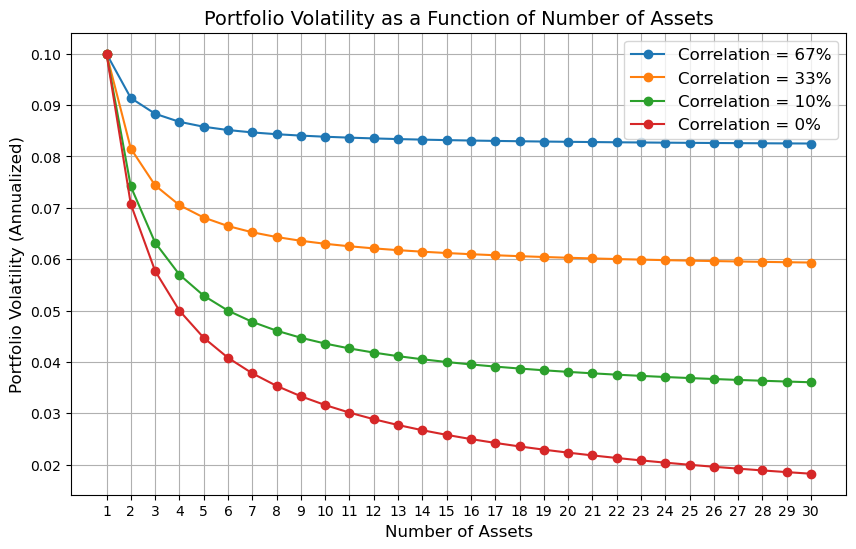

In [56]:
# Plotting the results
plt.figure(figsize=(10, 6))  # Create a figure with specified size

# Add a line for each correlation value
for corr, label in zip(correlations, labels):
    plt.plot(
        num_assets, 
        portfolio_volatilities_corr[corr], 
        marker="o", 
        linestyle="-", 
        label=label
    )

# Add titles and labels to the plot
plt.title(
    "Portfolio Volatility as a Function of Number of Assets", 
    fontsize=14
)  # Plot title
plt.xlabel("Number of Assets", fontsize=12)  # X-axis label
plt.ylabel("Portfolio Volatility (Annualized)", fontsize=12)  # Y-axis label
plt.grid(True)  # Add grid lines for better readability
plt.xticks(num_assets)  # Set ticks on the x-axis
plt.legend(fontsize=12)  # Add a legend to distinguish between lines

# Display the plot
plt.show()